In [ ]:
!gdown "https://drive.google.com/uc?id=1P-oVR0J35Dw40lzw47sE19oADSW-tyb1&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1P-oVR0J35Dw40lzw47sE19oADSW-tyb1&confirm=t
To: /content/demo.mp4
100% 9.56M/9.56M [00:00<00:00, 12.2MB/s]


In [1]:
folder_path = "."

In [7]:
import cv2 as cv
from glob import glob
import os
import random
import torch
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/Users/oscarcampohermoso/Library/Application Support/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Pre-Trained YOLOv8

In [1]:
# read in video paths
videos = glob(folder_path + '/inputs/*.mp4')
print(videos)

NameError: name 'glob' is not defined

In [ ]:
# pick pre-trained model
model_pretrained = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 309MB/s]


In [ ]:
# read video by index
video = cv.VideoCapture(videos[0])

# get video dimensions
frame_width = int(video.get(3))
frame_height = int(video.get(4))
size = (frame_width, frame_height)

# Define the codec and create VideoWriter object for MP4
fourcc = cv.VideoWriter_fourcc(*'mp4v')  # MP4 codec
output_path = os.path.join(folder_path, 'outputs', 'demo.mp4')
out = cv.VideoWriter(output_path, fourcc, 20.0, size)

ret = True
while ret:
    ret, frame = video.read()

    if ret:
        results = model_pretrained.track(frame, persist=True)
        composed = results[0].plot()

        # save video
        out.write(composed)

# Release everything once job is finished
out.release()
video.release()

print(f"Video saved at: {output_path}")

requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 176.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.5s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


0: 416x640 2 cars, 121.7ms
Speed: 16.5ms preprocess, 121.7ms inference, 1131.2ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 cars, 11.3ms
Speed: 3.7ms preprocess, 11.3ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 cars, 12.3ms
Speed: 5.1ms preprocess, 12.3ms inference, 3.3ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 cars, 11.4ms
Speed: 4.1ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 cars, 12.5ms
Speed: 4.3ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 cars, 8.3ms
Speed: 4.4ms preprocess

# Retraining YOLOv8

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cpu


In [5]:
dataset = folder_path+ '/data.yaml'

# load a model
# backbone = YOLO("yolov8n.yaml")  # build a new model from scratch
backbone = YOLO("yolov8n.pt")  # load a pre-trained model (recommended for training)

In [6]:
# Use the model
results = backbone.train(data=dataset, epochs=20, device=device)  # train the model

Ultralytics 8.3.9  Python-3.10.13 torch-2.4.1+cpu CPU (Intel Core(TM) i5-8400 2.80GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=./data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

train: Scanning D:\development\computer-vision\license-plate-imgs\train\labels.cache... 21173 images, 28 backgrounds, 0 corrupt: 100%|██████████| 21173/21173 [00:00<?, ?it/s]
val: Scanning D:\development\computer-vision\license-plate-imgs\valid\labels.cache... 2046 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2046/2046 [00:00<?, ?it/s]


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.494      3.813      1.495         24        640:   6%|▌         | 79/1324 [07:32<1:58:48,  5.73s/it]


KeyboardInterrupt: 

In [ ]:
model_save_path = folder_path + '/runs/trained_yolov8n.pt'  # Save in your drive folder
backbone.model.save(model_save_path)  # Manually save the trained model

print(f"Model saved to {model_save_path}")

In [ ]:
# Evaluate the model's performance on the validation set
results = backbone.val()

In [ ]:
# Perform object detection on an image using the model
results = backbone('inputs/car.png')

In [ ]:
# Export the model to ONNX format
# success = model.export(imgsz=(640, 480), format='onnx', opset=12, optimize=False, half=False)
# Export to PyTorch format
success = backbone.export(imgsz=640, format='torchscript', optimize=False, half=False, int8=False)
# TorchScript: export success ✅ 1.5s, saved as 'runs/detect/train11/weights/best.torchscript' (11.9 MB)

In [ ]:
# pick pre-trained model
np_model = YOLO('runs/detect/train11/weights/best.torchscript')

In [ ]:
# read video by index
video = cv.VideoCapture(videos[0])

# get video dimensions
frame_width = int(video.get(3))
frame_height = int(video.get(4))
size = (frame_width, frame_height)

# Define the codec and create VideoWriter object for MP4
fourcc = cv.VideoWriter_fourcc(*'mp4v')  # MP4 codec
output_path = os.path.join(folder_path, 'outputs', 'demo-2.mp4')
out = cv.VideoWriter(output_path, fourcc, 20.0, size)

ret = True
while ret:
    ret, frame = video.read()

    if ret:
        results = model_pretrained.track(frame, persist=True)
        composed = results[0].plot()

        # save video
        out.write(composed)

# Release everything once job is finished
out.release()
video.release()

print(f"Video saved at: {output_path}")

# Improving Training Results

In [ ]:
# unzip downloaded dataset to `./datasets`
dataset = 'datasets/data.yaml'

# load a model
# backbone = YOLO("yolov8n.yaml")  # build a new model from scratch
backbone_small = YOLO("yolov8s.pt")  # load a pre-trained model (recommended for training)

In [ ]:
# Use the model
results_medium = backbone_small.train(data=dataset, epochs=100)  # train the model

In [ ]:
# pick pre-trained model
np2_model = YOLO('runs/detect/train4/weights/best.pt')

In [ ]:
# Evaluate the model's performance on the validation set
results = np2_model.val()

# License Plate Detection

In [10]:
import ast
import cv2 as cv
import easyocr
from glob import glob
import numpy as np
import pandas as pd
import string
from ultralytics import YOLO

In [13]:
# regular pre-trained yolov8 model for car recognition
# coco_model = YOLO('yolov8n.pt')
coco_model = YOLO('yolov8s.pt')
# yolov8 model trained to detect number plates
np_model = YOLO(folder_path + '/runs/detect/train/weights/best.pt')

In [14]:
# read in test video paths
videos = glob(folder_path + '/inputs/*.mp4')
print(videos)

['./inputs/demo.mp4']


# STEP 1 Implementing the Car Detection

In [16]:
# read video by index
video = cv.VideoCapture(videos[0])

ret = True
frame_number = -1
# all vehicle class IDs from the COCO dataset (car, motorbike, truck) https://docs.ultralytics.com/datasets/detect/coco/#dataset-yaml
vehicles = [2,3,5]
vehicle_bounding_boxes = []

# read the 10 first frames
while ret:
    frame_number += 1
    ret, frame = video.read()

    if ret and frame_number < 10:
        # use track() to identify instances and track them frame by frame
        detections = coco_model.track(frame, persist=True)[0]
        # save cropped detections
        # detections.save_crop('outputs')
        # print nodel predictions for debugging
        # print(results)

        for detection in detections.boxes.data.tolist():
            # print detection bounding boxes for debugging
            # print(detection)
            x1, y1, x2, y2, track_id, score, class_id = detection
            # I am only interested in class IDs that belong to vehicles
            if int(class_id) in vehicles and score > 0.5:
                vehicle_bounding_boxes.append([x1, y1, x2, y2, track_id, score])

# print found bounding boxes for debugging
print(vehicle_bounding_boxes)
video.release()

requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.4 MB/s eta 0:00:002.3 MB/s eta 0:00:01

requirements: AutoUpdate success ✅ 2.6s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


0: 416x640 2 cars, 101.6ms
Speed: 1.7ms preprocess, 101.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 cars, 90.0ms
Speed: 1.3ms preprocess, 90.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 cars, 85.8ms
Speed: 1.6ms preprocess, 85.8ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 cars, 88.2ms
Speed: 1.6ms preprocess, 88.2ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 cars, 87.2ms
Speed: 1.4ms preprocess, 87.2ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 cars, 86.9ms
Speed: 2

# STEP 2 Implementing the License Plate Detection

In [17]:
# read video by index
video = cv.VideoCapture(videos[0])

ret = True
frame_number = -1
vehicles = [2,3,5]

# read the 10 first frames
while ret:
    frame_number += 1
    ret, frame = video.read()

    if ret and frame_number < 10:

        # vehicle detector
        detections = coco_model.track(frame, persist=True)[0]
        for detection in detections.boxes.data.tolist():
            x1, y1, x2, y2, track_id, score, class_id = detection
            if int(class_id) in vehicles and score > 0.5:
                vehicle_bounding_boxes = []
                vehicle_bounding_boxes.append([x1, y1, x2, y2, track_id, score])
                for bbox in vehicle_bounding_boxes:
                    print(bbox)
                    roi = frame[int(y1):int(y2), int(x1):int(x2)]
                    # debugging check if bbox lines up with detected vehicles (should be identical to save_crops() above
                    # cv.imwrite(str(track_id) + '.jpg', roi)

                    # license plate detector for region of interest
                    license_plates = np_model(roi)[0]
                    # check every bounding box for a license plate
                    for license_plate in license_plates.boxes.data.tolist():
                        plate_x1, plate_y1, plate_x2, plate_y2, plate_score, _ = license_plate
                        # verify detections
                        print(license_plate, 'track_id: ' + str(bbox[4]))
                        plate = roi[int(plate_y1):int(plate_y2), int(plate_x1):int(plate_x2)]
                        cv.imwrite(str(track_id) + '.jpg', plate)

video.release()


0: 416x640 2 cars, 92.1ms
Speed: 1.4ms preprocess, 92.1ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)
[78.8670425415039, 98.34742736816406, 257.88592529296875, 228.0613555908203, 1.0, 0.9115678071975708]

0: 480x640 (no detections), 50.1ms
Speed: 1.3ms preprocess, 50.1ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)
[121.54373931884766, 194.65066528320312, 866.6505126953125, 601.441162109375, 2.0, 0.8866708278656006]

0: 352x640 1 License_Plate, 35.1ms
Speed: 1.5ms preprocess, 35.1ms inference, 0.4ms postprocess per image at shape (1, 3, 352, 640)
[473.9349365234375, 328.672119140625, 666.0717163085938, 395.7479553222656, 0.7544417381286621, 0.0] track_id: 2.0

0: 416x640 2 cars, 91.3ms
Speed: 1.4ms preprocess, 91.3ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)
[78.89811706542969, 97.56342315673828, 262.391357421875, 231.3226776123047, 1.0, 0.9144792556762695]

0: 480x640 (no detections), 49.0ms
Speed: 1.6ms preprocess, 49.0

# STEP 3 Preprocess License Plates

In [19]:
# read video by index
video = cv.VideoCapture(videos[0])

ret = True
frame_number = -1
vehicles = [2, 3, 5]

# read the 10 first frames
while ret:
    frame_number += 1
    ret, frame = video.read()

    if ret and frame_number < 100:

        # vehicle detector
        detections = coco_model.track(frame, persist=True)[0]
        for detection in detections.boxes.data.tolist():
            if len(detection) == 7:
                x1, y1, x2, y2, track_id, score, class_id = detection
            else:
                x1, y1, x2, y2, score, class_id = detection
                track_id = None  # Asignar un valor por defecto si no hay track_id

            if int(class_id) in vehicles and score > 0.5:
                vehicle_bounding_boxes = []
                vehicle_bounding_boxes.append([x1, y1, x2, y2, track_id, score])
                for bbox in vehicle_bounding_boxes:
                    print(bbox)
                    roi = frame[int(y1):int(y2), int(x1):int(x2)]

                    # license plate detector for region of interest
                    license_plates = np_model(roi)[0]
                    # process license plate
                    for license_plate in license_plates.boxes.data.tolist():
                        plate_x1, plate_y1, plate_x2, plate_y2, plate_score, _ = license_plate
                        # crop plate from region of interest
                        plate = roi[int(plate_y1):int(plate_y2), int(plate_x1):int(plate_x2)]
                        # de-colorize
                        plate_gray = cv.cvtColor(plate, cv.COLOR_BGR2GRAY)
                        # posterize
                        _, plate_treshold = cv.threshold(plate_gray, 64, 255, cv.THRESH_BINARY_INV)
                        cv.imwrite(str(track_id) + '_gray.jpg', plate_gray)
                        cv.imwrite(str(track_id) + '_thresh.jpg', plate_treshold)

video.release()


0: 416x640 1 car, 88.5ms
Speed: 1.8ms preprocess, 88.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)
[92.21528625488281, 202.58029174804688, 923.76513671875, 658.303955078125, 3.0, 0.8866708278656006]

0: 352x640 1 License_Plate, 35.1ms
Speed: 1.8ms preprocess, 35.1ms inference, 0.3ms postprocess per image at shape (1, 3, 352, 640)

0: 416x640 2 cars, 84.7ms
Speed: 1.4ms preprocess, 84.7ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)
[110.20932006835938, 222.48452758789062, 941.0926513671875, 658.1541748046875, 3.0, 0.8972876667976379]

0: 352x640 1 License_Plate, 33.0ms
Speed: 1.2ms preprocess, 33.0ms inference, 0.3ms postprocess per image at shape (1, 3, 352, 640)
[79.95747375488281, 97.43531799316406, 262.3258056640625, 231.218505859375, 4.0, 0.9144792556762695]

0: 480x640 (no detections), 60.6ms
Speed: 15.7ms preprocess, 60.6ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 416x640 2 cars, 90.1ms
Speed: 1.4ms preproce

# STEP 4 Read License Plates

In [20]:
# Initialize the OCR reader
reader = easyocr.Reader(['en'], gpu=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [21]:
def read_license_plate(license_plate_crop):
    detections = reader.readtext(license_plate_crop)

    for detection in detections:
        bbox, text, score = detection

        text = text.upper().replace(' ', '')

        return text, score

    return None, None

In [22]:
def write_csv(results, output_path):

    with open(output_path, 'w') as f:
        f.write('{},{},{},{},{},{},{},{}\n'.format(
            'frame_number', 'track_id', 'car_bbox', 'car_bbox_score',
            'license_plate_bbox', 'license_plate_bbox_score', 'license_plate_number',
            'license_text_score'))

        for frame_number in results.keys():
            for track_id in results[frame_number].keys():
                print(results[frame_number][track_id])
                if 'car' in results[frame_number][track_id].keys() and \
                   'license_plate' in results[frame_number][track_id].keys() and \
                   'number' in results[frame_number][track_id]['license_plate'].keys():
                    f.write('{},{},{},{},{},{},{},{}\n'.format(
                        frame_number,
                        track_id,
                        '[{} {} {} {}]'.format(
                            results[frame_number][track_id]['car']['bbox'][0],
                            results[frame_number][track_id]['car']['bbox'][1],
                            results[frame_number][track_id]['car']['bbox'][2],
                            results[frame_number][track_id]['car']['bbox'][3]
                        ),
                        results[frame_number][track_id]['car']['bbox_score'],
                        '[{} {} {} {}]'.format(
                            results[frame_number][track_id]['license_plate']['bbox'][0],
                            results[frame_number][track_id]['license_plate']['bbox'][1],
                            results[frame_number][track_id]['license_plate']['bbox'][2],
                            results[frame_number][track_id]['license_plate']['bbox'][3]
                        ),
                        results[frame_number][track_id]['license_plate']['bbox_score'],
                        results[frame_number][track_id]['license_plate']['number'],
                        results[frame_number][track_id]['license_plate']['text_score'])
                    )
        f.close()

In [11]:
results = {}

# read video by index
video = cv.VideoCapture(videos[0])

ret = True
frame_number = -1
vehicles = [2, 3, 5]

# read the 10 first frames
while ret:
    frame_number += 1
    ret, frame = video.read()

    if ret and frame_number < 100:

        # vehicle detector
        detections = coco_model.track(frame, persist=True)[0]
        for detection in detections.boxes.data.tolist():
            if len(detection) == 7:
                x1, y1, x2, y2, track_id, score, class_id = detection
            else:
                x1, y1, x2, y2, score, class_id = detection
                track_id = None  # Asignar un valor por defecto si no hay track_id

            if int(class_id) in vehicles and score > 0.3:
                vehicle_bounding_boxes = []
                vehicle_bounding_boxes.append([x1, y1, x2, y2, track_id, score])
                for bbox in vehicle_bounding_boxes:
                    print(bbox)
                    roi = frame[int(y1):int(y2), int(x1):int(x2)]

                    # license plate detector for region of interest
                    license_plates = np_model(roi)[0]
                    # process license plate
                    for license_plate in license_plates.boxes.data.tolist():
                        plate_x1, plate_y1, plate_x2, plate_y2, plate_score, _ = license_plate
                        # crop plate from region of interest
                        plate = roi[int(plate_y1):int(plate_y2), int(plate_x1):int(plate_x2)]
                        # de-colorize
                        plate_gray = cv.cvtColor(plate, cv.COLOR_BGR2GRAY)
                        # posterize
                        _, plate_treshold = cv.threshold(plate_gray, 64, 255, cv.THRESH_BINARY_INV)
                        cv.imwrite(str(track_id) + '_gray.jpg', plate_gray)
                        cv.imwrite(str(track_id) + '_thresh.jpg', plate_treshold)

video.release()

NameError: name 'videos' is not defined

# STEP 5 Clean-Up License Plate Format

In [138]:
# Mapping dictionaries for character conversion
# characters that can easily be confused can be
# verified by their location - an `O` in a place
# where a number is expected is probably a `0`
dict_char_to_int = {'O': '0',
                    'I': '1',
                    'J': '3',
                    'A': '4',
                    'G': '6',
                    'S': '5'}

dict_int_to_char = {'0': 'O',
                    '1': 'I',
                    '3': 'J',
                    '4': 'A',
                    '6': 'G',
                    '5': 'S'}

In [139]:
def license_complies_format(text):
    print("Checking license plate format:")
    print(text)

    # Check for 5 or 7 characters (3 or 4 digits + 2 or 3 letters)
    if len(text) not in [5, 7]:
        print("License plate format is incorrect.")
        return False

    # Split the text into digits and letters based on its length
    if len(text) == 5:
        digits_part = text[:3]  # First 3 digits
        letters_part = text[3:]  # Last 2 letters
    else:  # len(text) == 7
        digits_part = text[:4]  # First 4 digits
        letters_part = text[4:]  # Last 3 letters

    # Check if the digits part is valid
    for char in digits_part:
        if char not in '0123456789' and char not in dict_char_to_int.keys():
            print("License plate format is incorrect.")
            return False

    # Check if the letters part is valid
    for char in letters_part:
        if char not in string.ascii_uppercase and char not in dict_int_to_char.keys():
            print("License plate format is incorrect.")
            return False

    print("License plate format is correct.")
    print("License plate: ", text)
    return True

In [140]:

def format_license(text):
    """
    Format the Bolivian license plate by converting confused characters.
    The first part contains 3 or 4 digits, and the last part contains exactly 3 letters.
    Returns the formatted plate.
    """
    text = text.strip().upper()
    formatted_text = []
    length = len(text)

    # Convert the last 3 characters to letters if they are numbers
    for i in range(length - 1, length - 4, -1):
        if i >= 0 and text[i] in dict_int_to_char:
            formatted_text.append(dict_int_to_char[text[i]])
        elif i >= 0:
            formatted_text.append(text[i])

    # Convert the remaining characters to digits if they are letters
    for i in range(length - 4, -1, -1):
        if text[i] in dict_char_to_int:
            formatted_text.append(dict_char_to_int[text[i]])
        else:
            formatted_text.append(text[i])

    # Reverse the list to get the correct order
    formatted_text.reverse()

    # Combine formatted characters
    formatted_plate = ''.join(formatted_text)

    return formatted_plate

In [141]:
def read_license_plate(license_plate_crop):
    # Perform OCR on the cropped license plate image
    detections = reader.readtext(license_plate_crop)
    print(detections)

    for detection in detections:
        bbox, text, score = detection

        # Process the text: convert to uppercase and remove spaces
        text = text.upper().replace(' ', '')
        print("Text: ", text, "Score: ", score)
        
        #Verify if the detected text matches a valid license plate format
        if license_complies_format(text):
            # If valid, return the formatted license plate and its OCR score
            print("Valid license plate detected: ", text)
            return format_license(text), score

    # If no valid license plate is found, return None
    return None, None


0: 448x640 3 cars, 92.3ms
Speed: 3.3ms preprocess, 92.3ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
0.8680713176727295 2.0

0: 544x640 1 License_Plate, 43.3ms
Speed: 1.9ms preprocess, 43.3ms inference, 0.3ms postprocess per image at shape (1, 3, 544, 640)
[([[47, 19], [144, 19], [144, 48], [47, 48]], 'BOLIVIA', 0.7145878767949416), ([[8, 37], [188, 37], [188, 113], [8, 113]], '6009plu', 0.5294833961025875)]
Text:  BOLIVIA Score:  0.7145878767949416
Checking license plate format:
BOLIVIA
License plate format is incorrect.
Text:  6009PLU Score:  0.5294833961025875
Checking license plate format:
6009PLU
License plate format is correct.
License plate:  6009PLU
Valid license plate detected:  6009PLU
6009PLU 0.5294833961025875
0.8057076334953308 2.0

0: 608x640 (no detections), 48.9ms
Speed: 1.3ms preprocess, 48.9ms inference, 0.2ms postprocess per image at shape (1, 3, 608, 640)
0.780638575553894 2.0

0: 192x640 (no detections), 61.1ms
Speed: 1.8ms preprocess, 61.1ms

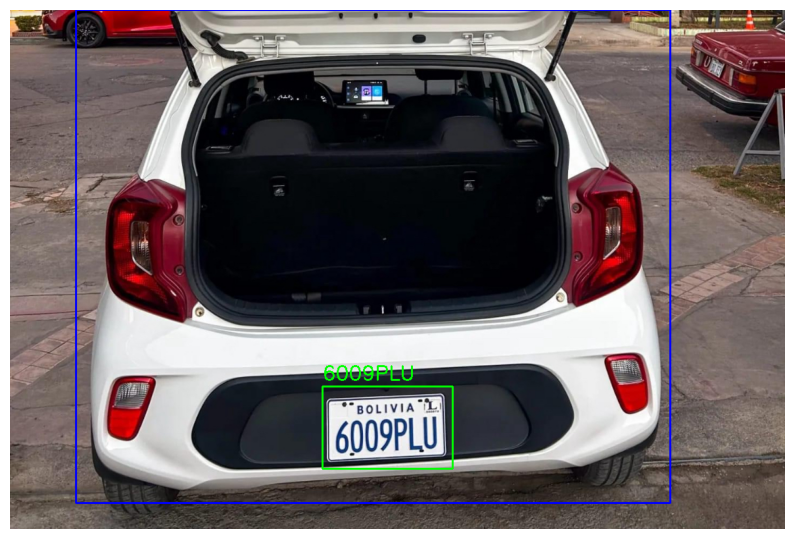

In [147]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load the static image
image_path = './img/6009PLU.jpg'
image = cv.imread(image_path)

# Ensure tracking logic is bypassed
coco_model.callbacks = {}  # Remove any callbacks related to tracking

# Detect vehicles in the static image
vehicles = [2, 3, 5, 7]  # Define vehicle class IDs (e.g., cars, trucks)
results = {}

# Vehicle detector (using predict instead of track)
detections = coco_model.predict(image)[0]  # Make sure this is just detection, no tracking
vehicle_bounding_boxes = []

for detection in detections.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = detection
    print(score, class_id)
    if int(class_id) in vehicles and score > 0.5:
        vehicle_bounding_boxes.append([x1, y1, x2, y2, None, score])  # track_id is None
        # Crop the vehicle's region of interest (ROI)
        roi = image[int(y1):int(y2), int(x1):int(x2)]

        # License plate detector for the region of interest
        license_plates = np_model.predict(roi)[0]

        # Process license plate
        for license_plate in license_plates.boxes.data.tolist():
            plate_x1, plate_y1, plate_x2, plate_y2, plate_score, _ = license_plate

            # Crop the plate from the region of interest
            plate = roi[int(plate_y1):int(plate_y2), int(plate_x1):int(plate_x2)]

            # Convert the plate to grayscale
            plate_gray = cv.cvtColor(plate, cv.COLOR_BGR2GRAY)

            # OCR to read the license plate text
            np_text, np_score = read_license_plate(plate_gray)
            print(np_text, np_score)
            # If plate is readable, store results
            if np_text is not None:
                results[None] = {  # track_id is None
                    'car': {
                        'bbox': [x1, y1, x2, y2],
                        'bbox_score': score
                    },
                    'license_plate': {
                        'bbox': [plate_x1, plate_y1, plate_x2, plate_y2],
                        'bbox_score': plate_score,
                        'number': np_text,
                        'text_score': np_score
                    }
                }

                # Draw vehicle and license plate bounding boxes on the image
                cv.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
                cv.rectangle(roi, (int(plate_x1), int(plate_y1)), (int(plate_x2), int(plate_y2)), (0, 255, 0), 2)
                cv.putText(roi, np_text, (int(plate_x1), int(plate_y1 - 10)), cv.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)

# Show the resulting image with detections in the notebook
plt.figure(figsize=(10, 8))
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.show()

# the rest

In [30]:
results = {}

# read video by index
video = cv.VideoCapture(videos[0])

ret = True
frame_number = -1
vehicles = [2,3,5]

# read the entire video
while ret:
    ret, frame = video.read()
    frame_number += 1
    if ret:
        results[frame_number] = {}

        # vehicle detector
        detections = coco_model.track(frame, persist=True)[0]
        for detection in detections.boxes.data.tolist():
            if len(detection) == 7:
                x1, y1, x2, y2, track_id, score, class_id = detection
            else:
                x1, y1, x2, y2, score, class_id = detection
                track_id = None  # Asignar un valor por defecto si no hay track_id
            if int(class_id) in vehicles and score > 0.5:
                vehicle_bounding_boxes = []
                vehicle_bounding_boxes.append([x1, y1, x2, y2, track_id, score])
                for bbox in vehicle_bounding_boxes:
                    print(bbox)
                    roi = frame[int(y1):int(y2), int(x1):int(x2)]

                    # license plate detector for region of interest
                    license_plates = np_model(roi)[0]
                    # process license plate
                    for license_plate in license_plates.boxes.data.tolist():
                        plate_x1, plate_y1, plate_x2, plate_y2, plate_score, _ = license_plate
                        # crop plate from region of interest
                        plate = roi[int(plate_y1):int(plate_y2), int(plate_x1):int(plate_x2)]
                        # de-colorize
                        plate_gray = cv.cvtColor(plate, cv.COLOR_BGR2GRAY)
                        # posterize
                        _, plate_treshold = cv.threshold(plate_gray, 64, 255, cv.THRESH_BINARY_INV)

                        # OCR
                        np_text, np_score = read_license_plate(plate_treshold)
                        # if plate could be read write results
                        if np_text is not None:
                            results[frame_number][track_id] = {
                                'car': {
                                    'bbox': [x1, y1, x2, y2],
                                    'bbox_score': score
                                },
                                'license_plate': {
                                    'bbox': [plate_x1, plate_y1, plate_x2, plate_y2],
                                    'bbox_score': plate_score,
                                    'number': np_text,
                                    'text_score': np_score
                                }
                            }

write_csv(results, './results.csv')
video.release()


0: 416x640 1 car, 96.8ms
Speed: 1.5ms preprocess, 96.8ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)
[115.21849060058594, 237.0220489501953, 841.6364135742188, 629.0665893554688, 11.0, 0.8866708278656006]

0: 352x640 1 License_Plate, 41.9ms
Speed: 1.9ms preprocess, 41.9ms inference, 0.3ms postprocess per image at shape (1, 3, 352, 640)

0: 416x640 2 cars, 97.5ms
Speed: 2.1ms preprocess, 97.5ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)
[118.21118927001953, 230.1175079345703, 914.975830078125, 650.3659057617188, 11.0, 0.8972876667976379]

0: 352x640 1 License_Plate, 42.2ms
Speed: 1.5ms preprocess, 42.2ms inference, 0.4ms postprocess per image at shape (1, 3, 352, 640)
[79.95747375488281, 97.43531799316406, 262.3258056640625, 231.218505859375, 14.0, 0.9144792556762695]

0: 480x640 (no detections), 51.7ms
Speed: 1.3ms preprocess, 51.7ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)

0: 416x640 2 cars, 93.1ms
Speed: 1.5ms prepr

In [31]:
results = pd.read_csv('./results.csv')

# show results for tracking ID `1` - sort by OCR prediction confidence
results[results['track_id'] == 1.].sort_values(by='license_text_score', ascending=False)

,frame_number,track_id,car_bbox,car_bbox_score,license_plate_bbox,license_plate_bbox_score,license_plate_number,license_text_score


# STEP 6 Visualize the Results

In [32]:
def draw_border(img, top_left, bottom_right, color=(0, 255, 0), thickness=6, line_length_x=200, line_length_y=200):
    x1, y1 = top_left
    x2, y2 = bottom_right

    cv.line(img, (x1, y1), (x1, y1 + line_length_y), color, thickness)  #-- top-left
    cv.line(img, (x1, y1), (x1 + line_length_x, y1), color, thickness)

    cv.line(img, (x1, y2), (x1, y2 - line_length_y), color, thickness)  #-- bottom-left
    cv.line(img, (x1, y2), (x1 + line_length_x, y2), color, thickness)

    cv.line(img, (x2, y1), (x2 - line_length_x, y1), color, thickness)  #-- top-right
    cv.line(img, (x2, y1), (x2, y1 + line_length_y), color, thickness)

    cv.line(img, (x2, y2), (x2, y2 - line_length_y), color, thickness)  #-- bottom-right
    cv.line(img, (x2, y2), (x2 - line_length_x, y2), color, thickness)

    return img

In [34]:
# read video by index
video = cv.VideoCapture(videos[0])

# get video dims
frame_width = int(video.get(3))
frame_height = int(video.get(4))
size = (frame_width, frame_height)

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'DIVX')
out = cv.VideoWriter('./outputs/processed.avi', fourcc, 20.0, size)

# reset video before you re-run cell below
frame_number = -1
video.set(cv.CAP_PROP_POS_FRAMES, 0)

True

In [35]:
ret = True

while ret:
    ret, frame = video.read()
    frame_number += 1
    if ret:
        df_ = results[results['frame_number'] == frame_number]
        for index in range(len(df_)):
            # draw car
            vhcl_x1, vhcl_y1, vhcl_x2, vhcl_y2 = ast.literal_eval(df_.iloc[index]['car_bbox'].replace('[ ', '[').replace('   ', ' ').replace('  ', ' ').replace(' ', ','))

            draw_border(
                frame, (int(vhcl_x1), int(vhcl_y1)),
                (int(vhcl_x2), int(vhcl_y2)), (0, 255, 0),
                12, line_length_x=200, line_length_y=200)

            # draw license plate
            plate_x1, plate_y1, plate_x2, plate_y2 = ast.literal_eval(df_.iloc[index]['license_plate_bbox'].replace('[ ', '[').replace('   ', ' ').replace('  ', ' ').replace(' ', ','))

            # region of interest
            roi = frame[int(vhcl_y1):int(vhcl_y2), int(vhcl_x1):int(vhcl_x2)]
            cv.rectangle(roi, (int(plate_x1), int(plate_y1)), (int(plate_x2), int(plate_y2)), (0, 0, 255), 6)

            # write detected number
            (text_width, text_height), _ = cv.getTextSize(
                df_.iloc[index]['license_plate_number'],
                cv.FONT_HERSHEY_SIMPLEX,
                2,
                6)

            cv.putText(
                frame,
                df_.iloc[index]['license_plate_number'],
                (int((vhcl_x2 + vhcl_x1 - text_width)/2), int(vhcl_y1 - text_height)),
                cv.FONT_HERSHEY_SIMPLEX,
                2,
                (0, 255, 0),
                6
            )

        out.write(frame)
        frame = cv.resize(frame, (1280, 720))

out.release()
video.release()

# Just testing

In [22]:
import cv2 as cv
import easyocr
from ultralytics import YOLO
import numpy as np

# Load YOLO models
coco_model = YOLO('yolov8s.pt')  # Pre-trained YOLO model for car detection
np_model = YOLO(folder_path + '/runs/detect/train/weights/best.pt')

# Initialize OCR reader
reader = easyocr.Reader(['en'])  # Specify the language for OCR

# Start video capture (use 0 for default camera)
cap = cv.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to capture frame. Exiting...")
        break
    
    # Use YOLO model to detect cars (from coco_model)
    car_results = coco_model(frame)
    
    # Filter out car detections (class 2 for 'car' in COCO dataset)
    for result in car_results:
        for box in result.boxes:
            if box.cls == 2:  # class 2 corresponds to cars in COCO
                x1, y1, x2, y2 = map(int, box.xyxy[0])  # Extract bounding box coordinates
                car_frame = frame[y1:y2, x1:x2]  # Crop car from frame
                
                # Detect license plates within the car bounding box using your trained np_model
                plate_results = np_model(car_frame)
                
                for p_result in plate_results:
                    for p_box in p_result.boxes:
                        px1, py1, px2, py2 = map(int, p_box.xyxy[0])  # Extract license plate coordinates
                        plate_frame = car_frame[py1:py2, px1:px2]  # Crop license plate from car frame
                        
                        # Convert the cropped license plate image to grayscale for better OCR accuracy
                        gray_plate = cv.cvtColor(plate_frame, cv.COLOR_BGR2GRAY)
                        
                        # Perform OCR on the cropped license plate
                        ocr_result = reader.readtext(gray_plate)
                        
                        # Display the OCR result on the frame
                        if ocr_result:
                            text = ocr_result[0][-2]  # Extract detected text
                            print("License Plate:", text)
                            # Draw the bounding box around the license plate
                            cv.rectangle(car_frame, (px1, py1), (px2, py2), (0, 255, 0), 2)
                            # Put the OCR text near the license plate
                            cv.putText(car_frame, text, (px1, py1 - 10), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

                # Draw bounding box around the car
                cv.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
    # Display the frame with detections
    cv.imshow('Real-Time License Plate Detection', frame)
    
    # Break the loop on 'q' key press
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all OpenCV windows
cap.release()
cv.destroyAllWindows()


0: 384x640 2 persons, 1 bottle, 1 tv, 151.6ms
Speed: 7.2ms preprocess, 151.6ms inference, 16.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 bottle, 2 tvs, 96.6ms
Speed: 1.4ms preprocess, 96.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 bottle, 2 tvs, 130.5ms
Speed: 1.7ms preprocess, 130.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 bottle, 2 tvs, 1 microwave, 85.6ms
Speed: 1.0ms preprocess, 85.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 bottle, 2 tvs, 80.7ms
Speed: 1.3ms preprocess, 80.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 bottle, 2 tvs, 88.4ms
Speed: 3.9ms preprocess, 88.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 bottle, 2 tvs, 81.6ms
Speed: 1.0ms preprocess, 81.6ms inference, 0.5ms postprocess per image a

In [1]:
!pip install fast-plate-ocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 1.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.7 MB/s eta 0:00:00


In [2]:
import cv2 as cv
from ultralytics import YOLO
from fast_plate_ocr import ONNXPlateRecognizer

# Load YOLO models
coco_model = YOLO('yolov8s.pt')  # Pre-trained YOLO model for car detection
np_model = YOLO('./runs/detect/train/weights/best.pt')  # Your trained model for license plates

# Initialize Fast Plate OCR with the pre-trained model
plate_recognizer = ONNXPlateRecognizer('argentinian-plates-cnn-model')

# Load a single image from disk
image_path = './img/IMG-20240214-WA0000.jpg'
frame = cv.imread(image_path)

if frame is None:
    print("Failed to load image. Exiting...")
else:
    # Use YOLO model to detect cars (from coco_model)
    car_results = coco_model(frame)

    # Filter out car detections (class 2 for 'car' in COCO dataset)
    for result in car_results:
        for box in result.boxes:
            if box.cls == 2:  # class 2 corresponds to cars in COCO
                x1, y1, x2, y2 = map(int, box.xyxy[0])  # Extract bounding box coordinates
                car_frame = frame[y1:y2, x1:x2]  # Crop car from frame

                # Detect license plates within the car bounding box using your trained np_model
                plate_results = np_model(car_frame)

                for p_result in plate_results:
                    for p_box in p_result.boxes:
                        px1, py1, px2, py2 = map(int, p_box.xyxy[0])  # Extract license plate coordinates
                        plate_frame = car_frame[py1:py2, px1:px2]  # Crop license plate from car frame

                        # Save the cropped license plate image to disk (optional step)
                        cv.imwrite('cropped_plate.png', plate_frame)

                        # Perform OCR using Fast Plate OCR
                        ocr_result = plate_recognizer.run('cropped_plate.png')

                        # Display the OCR result
                        if ocr_result:
                            ocr_text = str(ocr_result)  # Convert ocr_result to string
                            print("License Plate:", ocr_text)

                            # Draw the bounding box around the license plate in the original image
                            cv.rectangle(car_frame, (px1, py1), (px2, py2), (0, 255, 0), 2)
                            # Put the OCR text near the license plate
                            cv.putText(car_frame, ocr_text, (px1, py1 - 10), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

                # Draw bounding box around the car in the original image
                cv.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Display the frame with detections
    cv.imshow('License Plate Detection', frame)

    # Wait for a key press and close the image window
    cv.waitKey(0)
    cv.destroyAllWindows()


0: 640x384 1 person, 1 car, 1 bird, 88.7ms
Speed: 1.6ms preprocess, 88.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)



2024-10-22 19:48:02.968570 [W:onnxruntime:, coreml_execution_provider.cc:107 GetCapability] CoreMLExecutionProvider::GetCapability, number of partitions supported by CoreML: 2 number of nodes in the graph: 49 number of nodes supported by CoreML: 39


0: 640x640 1 License_Plate, 66.1ms
Speed: 1.6ms preprocess, 66.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
License Plate: ['A0566TP']



0: 640x512 (no detections), 110.6ms
Speed: 2.0ms preprocess, 110.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 512)


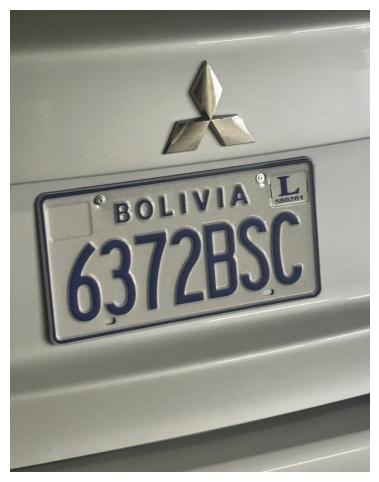

In [14]:
import cv2 as cv
import easyocr
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt

# Load YOLO models
coco_model = YOLO('yolov8s.pt')  # Pre-trained YOLO model for car detection
np_model = YOLO('runs/detect/train/weights/best.pt')  # Replace with your trained model path

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])  # Specify language(s) for OCR

# Load an image from the local file system
image_path = './img/6372BSC.jpg'
frame = cv.imread(image_path)

if frame is None:
    print("Failed to load image. Exiting...")
else:
    # Use YOLO model to detect cars (from coco_model)
    car_results = coco_model(frame)

    # Filter out car detections (class 2 for 'car' in COCO dataset)
    for result in car_results:
        for box in result.boxes:
            if box.cls == 2:  # class 2 corresponds to cars in COCO
                x1, y1, x2, y2 = map(int, box.xyxy[0])  # Extract bounding box coordinates
                car_frame = frame[y1:y2, x1:x2]  # Crop car from frame

                # Detect license plates within the car bounding box using your trained np_model
                plate_results = np_model(car_frame)

                for p_result in plate_results:
                    for p_box in p_result.boxes:
                        px1, py1, px2, py2 = map(int, p_box.xyxy[0])  # Extract license plate coordinates
                        plate_frame = car_frame[py1:py2, px1:px2]  # Crop license plate from car frame

                        # Convert the cropped license plate image to grayscale for better OCR accuracy
                        gray_plate = cv.cvtColor(plate_frame, cv.COLOR_BGR2GRAY)

                        # Recortar la parte inferior de la imagen de la placa para eliminar el texto adicional
                        height = gray_plate.shape[0]
                        cropped_plate = gray_plate[int(height * 0.3):, :]  # Ajusta el factor según sea necesario

                        # Perform OCR on the cropped license plate
                        ocr_result = reader.readtext(cropped_plate)

                        # Extract the detected text if OCR result is found
                        if ocr_result:
                            text = ocr_result[0][-2]  # Extract detected text from the OCR result
                            print("License Plate:", text)

                            # Draw the bounding box around the license plate
                            cv.rectangle(frame, (x1 + px1, y1 + py1), (x1 + px2, y1 + py2), (0, 255, 0), 2)
                            # Put the OCR text near the license plate
                            cv.putText(frame, text, (x1 + px1, y1 + py1 - 10), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

                # Draw bounding box around the car
                cv.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Convert the image from BGR (OpenCV format) to RGB (matplotlib format)
    frame_rgb = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

    # Display the image in the notebook
    plt.figure(figsize=(10, 6))
    plt.imshow(frame_rgb)
    plt.axis('off')  # Hide axis for better view
    plt.show()


0: 448x640 3 cars, 96.9ms
Speed: 1.8ms preprocess, 96.9ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
Cars detected, searching for license plates within cars...

0: 544x640 1 License_Plate, 43.4ms
Speed: 1.6ms preprocess, 43.4ms inference, 0.3ms postprocess per image at shape (1, 3, 544, 640)
License Plate: 6009plu

0: 608x640 (no detections), 50.1ms
Speed: 1.3ms preprocess, 50.1ms inference, 0.2ms postprocess per image at shape (1, 3, 608, 640)

0: 192x640 (no detections), 19.1ms
Speed: 1.0ms preprocess, 19.1ms inference, 0.2ms postprocess per image at shape (1, 3, 192, 640)


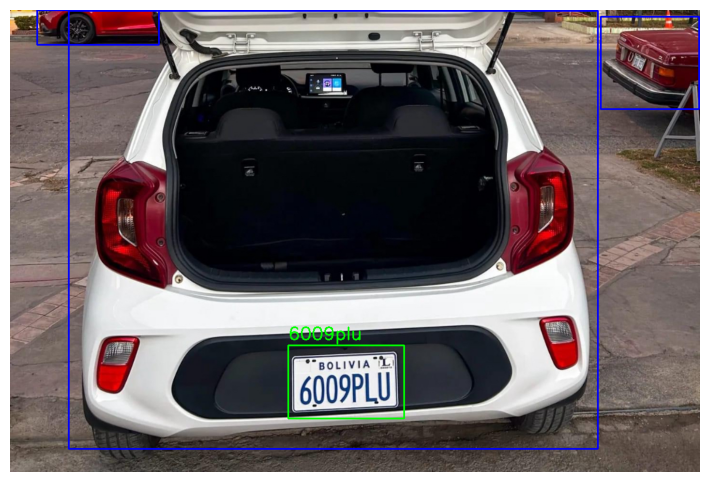

In [58]:
import cv2 as cv
import easyocr
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt

# Initialize YOLO models and EasyOCR
def load_models():
    try:
        coco_model = YOLO('yolov8s.pt')  # Pre-trained YOLO model for car detection
        np_model = YOLO('runs/detect/train/weights/best.pt')  # Replace with your trained license plate model
        reader = easyocr.Reader(['en'])  # Specify language(s) for OCR
    except Exception as e:
        print(f"Error loading models: {e}")
        return None, None, None
    return coco_model, np_model, reader

# Detect cars in the frame
def detect_cars(frame, model):
    try:
        car_results = model(frame)
        car_detections = [result.boxes for result in car_results if result is not None]
        return car_detections
    except Exception as e:
        print(f"Error detecting cars: {e}")
        return []

# Detect license plates in the frame
def detect_license_plates(frame, np_model):
    try:
        plate_results = np_model(frame)
        plate_detections = [p_result.boxes for p_result in plate_results if p_result is not None]
        return plate_detections
    except Exception as e:
        print(f"Error detecting license plates: {e}")
        return []

# Perform OCR on the cropped license plate
def perform_ocr(plate_frame, reader):
    try:
        gray_plate = cv.cvtColor(plate_frame, cv.COLOR_BGR2GRAY)  # Convert to grayscale for better OCR accuracy
        height = gray_plate.shape[0]
        cropped_plate = gray_plate[int(height * 0.3):, :]  # Remove bottom part of license plate
        ocr_result = reader.readtext(cropped_plate)  # Perform OCR on the cropped license plate
        if ocr_result:
            return ocr_result[0][-2]  # Extract the text
        else:
            return None
    except Exception as e:
        print(f"Error in OCR: {e}")
        return None

# Main function to process image
def process_image(image_path):
    frame = cv.imread(image_path)
    if frame is None:
        print("Failed to load image. Exiting...")
        return

    coco_model, np_model, reader = load_models()
    if not coco_model or not np_model or not reader:
        print("Error loading models. Exiting...")
        return

    car_detections = detect_cars(frame, coco_model)

    if not car_detections:  # If no cars are detected, attempt to detect license plates directly
        print("No cars detected, searching for license plates directly in the image...")
        plate_detections = detect_license_plates(frame, np_model)

        for p_boxes in plate_detections:
            for p_box in p_boxes:
                px1, py1, px2, py2 = map(int, p_box.xyxy[0])
                plate_frame = frame[py1:py2, px1:px2]

                # Perform OCR and get license plate text
                text = perform_ocr(plate_frame, reader)
                if text:
                    print("License Plate:", text)

                    # Draw license plate bounding box
                    cv.rectangle(frame, (px1, py1), (px2, py2), (0, 255, 0), 2)
                    cv.putText(frame, text, (px1, py1 - 10), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    else:
        print("Cars detected, searching for license plates within cars...")
        for boxes in car_detections:
            for box in boxes:
                if box.cls == 2:  # Class 2 corresponds to 'car' in COCO dataset
                    x1, y1, x2, y2 = map(int, box.xyxy[0])  # Extract bounding box
                    car_frame = frame[y1:y2, x1:x2]  # Crop car from frame

                    plate_detections = detect_license_plates(car_frame, np_model)

                    for p_boxes in plate_detections:
                        for p_box in p_boxes:
                            px1, py1, px2, py2 = map(int, p_box.xyxy[0])
                            plate_frame = car_frame[py1:py2, px1:px2]

                            # Perform OCR and get license plate text
                            text = perform_ocr(plate_frame, reader)
                            if text:
                                print("License Plate:", text)

                                # Draw license plate bounding box
                                cv.rectangle(frame, (x1 + px1, y1 + py1), (x1 + px2, y1 + py2), (0, 255, 0), 2)
                                cv.putText(frame, text, (x1 + px1, y1 + py1 - 10), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

                    # Draw car bounding box
                    cv.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Convert BGR (OpenCV) to RGB (Matplotlib)
    frame_rgb = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(10, 6))
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()

# Run the process on an image
process_image('./img/6009PLU.jpg')

In [148]:
!ls

README.dataset.txt   first-test           runs
README.md            img                  test.py
README.roboflow.txt  inputs               training-model.ipynb
cropped_plate.png    outputs              yolov8s.pt
data.yaml            results.csv


In [151]:
!python test.py


0: 448x640 3 cars, 88.5ms
Speed: 2.0ms preprocess, 88.5ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
0.8680713176727295 2.0

0: 544x640 1 License_Plate, 45.5ms
Speed: 1.8ms preprocess, 45.5ms inference, 0.3ms postprocess per image at shape (1, 3, 544, 640)
[([[47, 19], [144, 19], [144, 48], [47, 48]], 'BOLIVIA', 0.7145878767949416), ([[8, 37], [188, 37], [188, 113], [8, 113]], '6009plu', 0.5294833961025875)]
Text:  BOLIVIA Score:  0.7145878767949416
Checking license plate format:
BOLIVIA
License plate format is incorrect.
Text:  6009PLU Score:  0.5294833961025875
Checking license plate format:
6009PLU
License plate format is correct.
License plate:  6009PLU
Valid license plate detected:  6009PLU
6009PLU 0.5294833961025875
0.8057076334953308 2.0

0: 608x640 (no detections), 63.0ms
Speed: 1.3ms preprocess, 63.0ms inference, 0.2ms postprocess per image at shape (1, 3, 608, 640)
0.780638575553894 2.0

0: 192x640 (no detections), 18.9ms
Speed: 0.4ms preprocess, 18.9ms